In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from rubin_sim.maf import normalize_for_radar, radar
import pandas as pd


In [2]:
data = pd.read_hdf('summary.h5')

In [3]:
#data = data.set_index('runName')
data

metric,Mean SNSLMetric DD:ELAISS1 all bands HealpixSubsetSlicer,Median SNSLMetric DD:ELAISS1 all bands HealpixSubsetSlicer,Sum SNSLMetric DD:ELAISS1 all bands HealpixSubsetSlicer,Mean AGN_TimeLag_100_days DD:ELAISS1 all bands HealpixSubsetSlicer,Median AGN_TimeLag_100_days DD:ELAISS1 all bands HealpixSubsetSlicer,Rms AGN_TimeLag_100_days DD:ELAISS1 all bands HealpixSubsetSlicer,Mean AGN_TimeLag_5_days DD:ELAISS1 all bands HealpixSubsetSlicer,Median AGN_TimeLag_5_days DD:ELAISS1 all bands HealpixSubsetSlicer,Rms AGN_TimeLag_5_days DD:ELAISS1 all bands HealpixSubsetSlicer,Median DD:ELAISS1 NVisits all bands HealpixSubsetSlicer,...,N(-3Sigma) CoaddM5 u HealpixSlicer,CoaddM5 u HealpixSlicer,top18k CoaddM5 u HealpixSlicer,10th%ile CoaddM5 u HealpixSlicer,Percents_DD:XMM_LSS,Percents_DD:EDFS_a,Percents_DD:EDFS_b,Counts_DD:XMM_LSS,Counts_DD:EDFS_a,Counts_DD:EDFS_b
run_name,,,,,,,,,,,,,,,,,,,,,
baseline_v2.1_10yrs,0.000009,0.000009,0.013812,134.402877,125.226246,87.050035,8.316156,8.509384,3.626564,9127.0,...,407.0,29828.0,25.523559,25.102861,NaN,NaN,NaN,NaN,NaN,NaN
baseline_v2.2_10yrs,0.000009,0.000009,0.013993,146.044152,136.852575,94.131069,8.802938,8.744044,4.048738,9991.0,...,425.0,29811.0,25.482794,25.064598,1.006663,0.496632,0.495861,20888.0,10305.0,10289.0


In [4]:
cols = ['best18k parallax  HealpixSlicer',
        'best18k properMotion  HealpixSlicer',
        'fONv MedianNvis fO  HealpixSlicer',
        'Total detected SNNSNMetric_nSN  HealpixSlicer',
        'Fraction detected of total (mean) TDEsPopMetric__some_color  UserPointsSlicer',
        'Median WeakLensingNvisits gri band non-DD HealpixSlicer',
        '3x2ptFoM ExgalM5_with_cuts i band non-DD year 10 HealpixSlicer',
        'Total detected MicrolensingMetric_detect tE 5_10 days UserPointsSlicer',
        'Total detected MicrolensingMetric_detect tE 30_60 days UserPointsSlicer',
        'DifferentialCompleteness H = 16.000000 Discovery_N_Chances NEO 3 pairs in 15 nights detection loss MoObjSlicer',
        'DifferentialCompleteness H = 22.000000 Discovery_N_Chances NEO 3 pairs in 15 nights detection loss MoObjSlicer',
       'DifferentialCompleteness H = 6.000000 Discovery_N_Chances TNO 3 pairs in 15 nights detection loss MoObjSlicer']#,
#        'Nstars_no_crowding_Total N Stars, no crowding',
#        'NEO bright', 'NEO faint', 'TNO']

linear_cols = []

mag_cols = ['runName', 'median_coadd_u', 'median_coadd_g',
           'median_coadd_r', 'median_coadd_i',
            'median_coadd_z', 'median_coadd_y']


name_mapper = {'runName': 'runName',
               'best18k parallax  HealpixSlicer': 'Parallax',
               'best18k properMotion  HealpixSlicer': 'Proper Motion',
               'fONv MedianNvis fO  HealpixSlicer': 'fO N',
               'Total detected SNNSNMetric_nSN  HealpixSlicer': 'SNeIa',
               'Total detected MicrolensingMetric_detect tE 5_10 days UserPointsSlicer': 'Fast Micro L',
       'Total detected MicrolensingMetric_detect tE 30_60 days UserPointsSlicer': 'Slow Micro L',
        'Fraction detected of total (mean) TDEsPopMetric__some_color  UserPointsSlicer': 'TDE',
               'Median WeakLensingNvisits gri band non-DD HealpixSlicer': 'WL',
               '3x2ptFoM ExgalM5_with_cuts i band non-DD year 10 HealpixSlicer': '3x2FoM',
       'Nstars_no_crowding_Total N Stars, no crowding': 'N Stars',
       'DifferentialCompleteness H = 16.000000 Discovery_N_Chances NEO 3 pairs in 15 nights detection loss MoObjSlicer': 'NEO, bright',
               'DifferentialCompleteness H = 22.000000 Discovery_N_Chances NEO 3 pairs in 15 nights detection loss MoObjSlicer':'NEO, faint',
        'DifferentialCompleteness H = 6.000000 Discovery_N_Chances TNO 3 pairs in 15 nights detection loss MoObjSlicer':' TNO',
              'NEO bright': 'NEO, bright', 'NEO faint': 'NEO, faint',
              'TNO': 'TNO'}

mag_name_mapper = {'runName': 'runName', 'median_coadd_u': 'u', 'median_coadd_g': 'g',
       'median_coadd_r': 'r', 'median_coadd_i': 'i', 'median_coadd_z': 'z', 'median_coadd_y': 'y'}

In [5]:
data

metric,Mean SNSLMetric DD:ELAISS1 all bands HealpixSubsetSlicer,Median SNSLMetric DD:ELAISS1 all bands HealpixSubsetSlicer,Sum SNSLMetric DD:ELAISS1 all bands HealpixSubsetSlicer,Mean AGN_TimeLag_100_days DD:ELAISS1 all bands HealpixSubsetSlicer,Median AGN_TimeLag_100_days DD:ELAISS1 all bands HealpixSubsetSlicer,Rms AGN_TimeLag_100_days DD:ELAISS1 all bands HealpixSubsetSlicer,Mean AGN_TimeLag_5_days DD:ELAISS1 all bands HealpixSubsetSlicer,Median AGN_TimeLag_5_days DD:ELAISS1 all bands HealpixSubsetSlicer,Rms AGN_TimeLag_5_days DD:ELAISS1 all bands HealpixSubsetSlicer,Median DD:ELAISS1 NVisits all bands HealpixSubsetSlicer,...,N(-3Sigma) CoaddM5 u HealpixSlicer,CoaddM5 u HealpixSlicer,top18k CoaddM5 u HealpixSlicer,10th%ile CoaddM5 u HealpixSlicer,Percents_DD:XMM_LSS,Percents_DD:EDFS_a,Percents_DD:EDFS_b,Counts_DD:XMM_LSS,Counts_DD:EDFS_a,Counts_DD:EDFS_b
run_name,,,,,,,,,,,,,,,,,,,,,
baseline_v2.1_10yrs,0.000009,0.000009,0.013812,134.402877,125.226246,87.050035,8.316156,8.509384,3.626564,9127.0,...,407.0,29828.0,25.523559,25.102861,NaN,NaN,NaN,NaN,NaN,NaN
baseline_v2.2_10yrs,0.000009,0.000009,0.013993,146.044152,136.852575,94.131069,8.802938,8.744044,4.048738,9991.0,...,425.0,29811.0,25.482794,25.064598,1.006663,0.496632,0.495861,20888.0,10305.0,10289.0


In [6]:


data_normed = normalize_for_radar(data[cols], mag_cols=linear_cols,
                      invert_cols=['best18k parallax  HealpixSlicer', 'best18k properMotion  HealpixSlicer'], norm_run='baseline_v2.1_10yrs')
data_normed = data_normed.rename(columns=name_mapper)

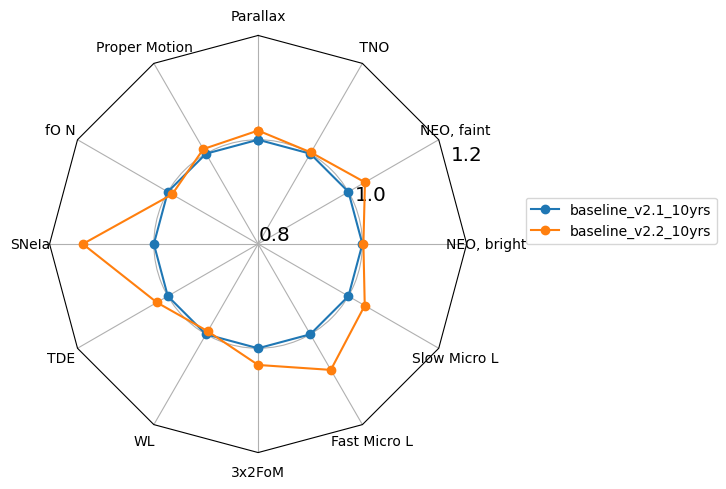

In [7]:
fig, ax = radar(data_normed, legend=True, rgrids=[0.8, 1.0, 1.2])
fig.tight_layout()
#fig.savefig('radar_plots/even_filt_radar.pdf')


In [8]:
data[cols]

metric,best18k parallax HealpixSlicer,best18k properMotion HealpixSlicer,fONv MedianNvis fO HealpixSlicer,Total detected SNNSNMetric_nSN HealpixSlicer,Fraction detected of total (mean) TDEsPopMetric__some_color UserPointsSlicer,Median WeakLensingNvisits gri band non-DD HealpixSlicer,3x2ptFoM ExgalM5_with_cuts i band non-DD year 10 HealpixSlicer,Total detected MicrolensingMetric_detect tE 5_10 days UserPointsSlicer,Total detected MicrolensingMetric_detect tE 30_60 days UserPointsSlicer,DifferentialCompleteness H = 16.000000 Discovery_N_Chances NEO 3 pairs in 15 nights detection loss MoObjSlicer,DifferentialCompleteness H = 22.000000 Discovery_N_Chances NEO 3 pairs in 15 nights detection loss MoObjSlicer,DifferentialCompleteness H = 6.000000 Discovery_N_Chances TNO 3 pairs in 15 nights detection loss MoObjSlicer
run_name,,,,,,,,,,,,
baseline_v2.1_10yrs,0.806910,0.188258,838.0,99294.339899,0.0536,443.0,38.560143,1535.0,3764.0,0.9284,0.355,0.6498
baseline_v2.2_10yrs,0.792958,0.186345,830.0,112825.101220,0.0549,440.0,39.794283,1656.0,3900.0,0.9302,0.368,0.6516
